In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [26]:
tsla = yf.download("TSLA", start="2015-01-01", end="2025-11-13")
# tsla = tsla.droplevel(level=1, axis=1)
tsla = tsla.dropna(how="all").asfreq("B").ffill()
tsla.head()

/tmp/ipython-input-2186100665.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla = yf.download("TSLA", start="2015-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000.0
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500.0
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500.0
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000.0
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500.0


In [27]:
#Add columns
def column_add(df)->pd.DataFrame:
    df['Returns'] = df['Close'].pct_change()
    df['LogReturns'] = np.log(df['Close'] / df['Close'].shift(1))
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['MA60'] = df['Close'].rolling(window=60).mean()
    df['Volatility20'] = df['Returns'].rolling(window=20).std()
    df['Volatility'] = df['Volatility20']* np.sqrt(252)  #Annualized Volatility
    return df

In [28]:
column_add(tsla)
tsla.head()

Price,Close,High,Low,Open,Volume,Returns,LogReturns,MA20,MA60,Volatility20,Volatility
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,,,,,,
Date,,,,,,,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500.0,-0.042041,-0.042950,NaN,NaN,NaN,NaN
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500.0,0.005664,0.005648,NaN,NaN,NaN,NaN
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000.0,-0.001562,-0.001563,NaN,NaN,NaN,NaN
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500.0,-0.001564,-0.001566,NaN,NaN,NaN,NaN


In [29]:
###나머지 관련주 - EV Sector
#1. Nio Inc. (NIO)
nio = yf.download("NIO", start="2015-01-01", end="2025-11-13")
column_add(nio)

#2. ChargePoint Holdings
chpt = yf.download("CHPT", start="2015-01-01", end="2025-11-13")
column_add(chpt)
#3. Volkswagen AG
vwagy = yf.download("VWAGY", start="2015-01-01", end="2025-11-13")
column_add(vwagy)

#6. TM(Toyota Motor)
tm = yf.download("TM", start="2015-01-01", end="2025-11-13")
column_add(tm)

# byd: BYD Company
byd = yf.download("1211.HK", start="2015-01-01", end="2025-11-13")
column_add(byd)

/tmp/ipython-input-3126502926.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nio = yf.download("NIO", start="2015-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3126502926.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  chpt = yf.download("CHPT", start="2015-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3126502926.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vwagy = yf.download("VWAGY", start="2015-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3126502926.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tm = yf.download("TM", start="2015-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed
/t

Price,Close,High,Low,Open,Volume,Returns,LogReturns,MA20,MA60,Volatility20,Volatility
Ticker,1211.HK,1211.HK,1211.HK,1211.HK,1211.HK,,,,,,
Date,,,,,,,,,,,
2015-01-02,10.021317,10.037099,9.547868,9.737248,24822066,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,10.021317,10.116006,9.800375,10.052879,34120002,0.000000,0.000000,NaN,NaN,NaN,NaN
2015-01-06,10.068662,10.100224,9.863500,10.021317,17734590,0.004724,0.004713,NaN,NaN,NaN,NaN
2015-01-07,9.216455,10.037099,9.090203,10.037099,39908772,-0.084640,-0.088437,NaN,NaN,NaN,NaN
2015-01-08,9.326928,9.547870,9.279583,9.374272,19330665,0.011987,0.011915,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-11-06,97.650002,97.800003,94.150002,94.650002,31445844,0.023585,0.023311,103.6775,108.094167,0.018257,0.289817
2025-11-07,97.900002,98.750000,96.900002,97.300003,20328719,0.002560,0.002557,103.0625,107.870833,0.018203,0.288970


In [59]:
mga = yf.download("MGA", start="2015-01-01", end="2025-11-13")
column_add(mga)
mga = mga.dropna(how="all").asfreq("B").ffill()
print(len(mga))

plug = yf.download("PLUG", start="2015-01-01", end="2025-11-13")
column_add(plug)
plug = plug.dropna(how="all").asfreq("B").ffill()
print(len(plug))

vale = yf.download("VALE", start="2015-01-01", end="2025-11-13")
column_add(vale)
vale = vale.dropna(how="all").asfreq("B").ffill()
print(len(vale))

/tmp/ipython-input-670006604.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  mga = yf.download("MGA", start="2015-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-670006604.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  plug = yf.download("PLUG", start="2015-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-670006604.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vale = yf.download("VALE", start="2015-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed


2834
2834
2834


In [56]:
##영업일 기준(5일) resampling
nio = nio.dropna(how='all').asfreq('B').ffill()
print(f"nio len: {nio.shape[0]}")

chpt = chpt.dropna(how='all').asfreq('B').ffill()
print(f"chpt len: {chpt.shape[0]}")

vwagy = vwagy.dropna(how='all').asfreq('B').ffill()
print(f"vwagy len: {vwagy.shape[0]}")

tm = tm.dropna(how='all').asfreq('B').ffill()
print(f"tm len: {tm.shape[0]}")

byd = byd.dropna(how='all').asfreq('B').ffill()
print(f"byd len: {byd.shape[0]}")

nio len: 1871
chpt len: 1608
vwagy len: 2834
tm len: 2834
byd len: 2834


In [70]:
### Intersection of Dates
def align_dates(df1, name1, df2=tsla, name2='tsla'):
    # 필요한 컬럼만 추출하고 common dates로 inner join
    a = df1[['LogReturns']].dropna()
    b = df2[['LogReturns', 'Close']].dropna()#tsla는 close price도 필요
    df_merged = pd.concat([a, b], axis=1, join='inner', keys=[name1, name2])
    df_merged.columns = [f'{name1}_LogReturns',f'{name2}_Close', f'{name2}_LogReturns']
    return df_merged

In [80]:
corr_companies = [mga, plug, vale, vwagy, tm, byd]
com_names = ["mga", "plug", "vale", "vwagy", "tm", "byd", "tsla"]
corr_companies_trimmed = []
for company in corr_companies:
    trimmed = company[['LogReturns']].dropna()
    corr_companies_trimmed.append(trimmed)

corr_companies_trimmed.append(tsla[["LogReturns", "Close"]].dropna())
df_merged = pd.concat(corr_companies_trimmed, axis=1, join="inner", keys=com_names)
df_merged.columns = [f'{name}_LogReturns' for name in com_names] + ['tsla_Close']
df_merged

,mga_LogReturns,plug_LogReturns,vale_LogReturns,vwagy_LogReturns,tm_LogReturns,byd_LogReturns,tsla_LogReturns,tsla_Close
Date,,,,,,,,
2015-01-05,-0.021580,0.010017,-0.026804,-0.038524,-0.018471,0.000000,-0.042950,14.006000
2015-01-06,-0.021864,0.013201,0.051681,0.010884,-0.010347,0.004713,0.005648,14.085333
2015-01-07,0.028611,0.000000,0.024273,0.005278,0.024832,-0.088437,-0.001563,14.063333
2015-01-08,0.018782,0.009788,0.027204,0.025048,0.019071,0.011915,-0.001566,14.041333
2015-01-09,-0.021494,-0.022989,-0.002336,-0.017183,-0.011827,0.011775,-0.018981,13.777333
...,...,...,...,...,...,...,...,...
2025-11-06,-0.005824,-0.050496,-0.006520,0.001837,0.018852,0.023311,-0.035599,445.910004
2025-11-07,0.004421,0.054277,-0.006563,0.017281,-0.004742,0.002557,-0.037449,429.519989
2025-11-10,-0.013729,-0.034552,0.012270,0.008977,0.009657,0.039064,0.035923,445.230011


<Axes: >

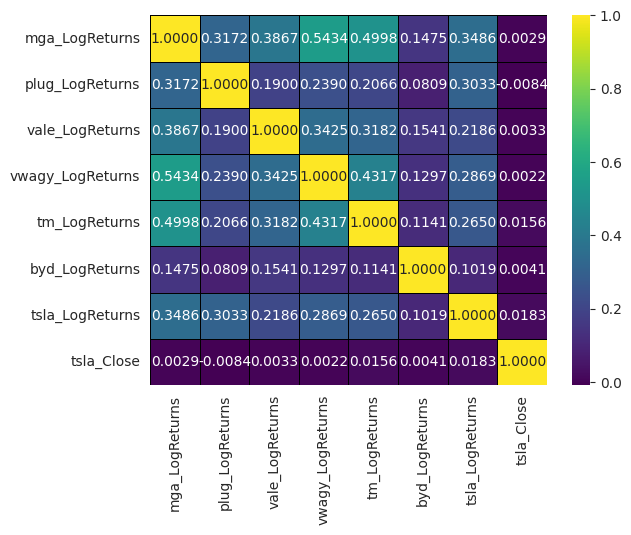

In [81]:
import seaborn as sns

sns.heatmap(df_merged.corr(), annot=True, cmap='viridis', fmt='.4f', linewidths=0.5, linecolor='black')

In [82]:
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

scaler = StandardScaler()
df_merged['label'] = df_merged['tsla_LogReturns']
df_merged.iloc[:,0:7] = scaler.fit_transform(df_merged.iloc[:,0:7])

In [83]:
def generate_dataset(df, input_idx, target_idx, window_size, test_n):
    x, y = [], []

    for i in range(len(df) - window_size):
        x.append(df.iloc[i:i+window_size, input_idx].values)
        y.append(df.iloc[i+window_size, target_idx])

    x = np.array(x)
    y = np.array(y)

    # -----------------------------
    # Time-based Train / Test split
    # -----------------------------
    test_idx = len(df) - test_n
    split_point = test_idx - window_size

    x_train = x[:split_point]
    y_train = y[:split_point]

    x_test = x[split_point:]
    y_test = y[split_point:]

    # -----------------------------
    # Train / Validation split
    # -----------------------------
    x_train, x_val, y_train, y_val = train_test_split(
        x_train, y_train,
        test_size=0.1,
        shuffle=False   # 시계열이므로 False
    )

    print(f"# Train: {y_train.shape[0]}")
    print(f"# Val:   {y_val.shape[0]}")
    print(f"# Test:  {y_test.shape[0]}")
    print(f"# Input shape: {x_train.shape[1:]}")

    return x_train, y_train, x_val, y_val, x_test, y_test


# 1. LSTM 모델

def build_lstm(input_shape):
    model = keras.Sequential([
        keras.layers.LSTM(
            64, activation='tanh',
            input_shape=input_shape,
            return_sequences=False
        ),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1)
    ])
    model.compile(
        loss='mae',
        optimizer=Adam(0.001),
        metrics=['mae']
    )
    return model


In [84]:
def run_experiment(df, input_idx, target_idx, window_size):

    print("\n====================================")
    print(f" Running Window Size = {window_size}")
    print("====================================\n")

    # Dataset 생성
    test_n = int(0.2 * len(df))

    x_train, y_train, x_val, y_val, x_test, y_test = generate_dataset(
        df, input_idx, target_idx, window_size, test_n
    )

    # Model
    model = build_lstm((x_train.shape[1], x_train.shape[2]))

    checkpoint_path = f"./best_lstm_cols{input_idx}_ws{window_size}.weights.h5"

    cbk = keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path,
        save_weights_only=True,
        monitor="val_mae",
        mode="min",
        save_best_only=True
    )

    es = keras.callbacks.EarlyStopping(
    monitor="val_mae",
    patience=50,
    restore_best_weights=True
)


    # -----------------------------
    # Train
    # -----------------------------
    history = model.fit(
        x_train, y_train,
        epochs=200,
        batch_size=32,
        validation_data=(x_val, y_val),
        callbacks=[cbk, es],
        verbose=1
    )

    # -----------------------------
    # Test
    # -----------------------------
    model.load_weights(checkpoint_path)
    loss, mae = model.evaluate(x_test, y_test, verbose=0)
    print("\nTest MAE (log return):", mae)

    y_pred = model.predict(x_test).flatten()

    # Date index 추출
    test_idx = len(df) - test_n
    split_point = test_idx - window_size
    test_start_index = split_point + window_size

    date_index = df.index[
        test_start_index : test_start_index + len(y_test)
    ]
    # log return → TSLA Close Price 복원

    tsla_close_prev = df.iloc[
    test_start_index - 1 : test_start_index + len(y_test) - 1,
    7   # tsla_close column index
    ].values


    y_test_price = df.iloc[test_start_index:test_start_index+len(y_test),7].values #y_test: g.t tsla close price for test set->1이 tsla_close price column
    y_pred_price = tsla_close_prev * np.exp(y_pred) #이전 tsla close price * exp(predicted log return)->predicted close price

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(date_index, y_test_price, label="True TSLA Close", color="orange")
    plt.plot(date_index, y_pred_price, label="Predicted TSLA Close", color="skyblue")
    plt.title(f"TSLA Close Prediction (Window = {window_size})")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # Metrics
    mae_price = np.mean(np.abs(y_test_price - y_pred_price))
    rmse_price = np.sqrt(np.mean((y_test_price - y_pred_price)**2))
    direction_acc = np.mean(
    np.sign(np.diff(y_test_price)) == np.sign(np.diff(y_pred_price))
  )
    mape = np.mean(np.abs((y_test_price - y_pred_price) / y_test_price)) * 100


    result = {
        "MAE_price": mae_price,
        "RMSE_price": rmse_price,
        "MAPE_price": mape,
        "direction_acc": direction_acc
    }


    print("\nMetrics:")
    for k, v in result.items():
        print(f"{k}: {v:.4f}")

    return result


## Using All


 Running Window Size = 20

# Train: 2022
# Val:   225
# Test:  566
# Input shape: (20, 7)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0688 - mae: 0.0688 - val_loss: 0.0301 - val_mae: 0.0301
Epoch 2/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0328 - mae: 0.0328 - val_loss: 0.0284 - val_mae: 0.0284
Epoch 3/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0251 - mae: 0.0251 - val_loss: 0.0283 - val_mae: 0.0283
Epoch 4/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0256 - mae: 0.0256 - val_loss: 0.0283 - val_mae: 0.0283
Epoch 5/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0232 - mae: 0.0232 - val_loss: 0.0283 - val_mae: 0.0283
Epoch 6/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0241 - mae: 0.0241 - val_loss: 0.0282 - val_mae: 0.0282
Epoch 7/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0240 - mae: 0.0240 - val_loss: 0.0281 - val_mae: 0.0281
Epoch 8/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0238 - mae: 0.0238 - val_loss: 0.0281 - val_mae: 0.0281
Epoch 9/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

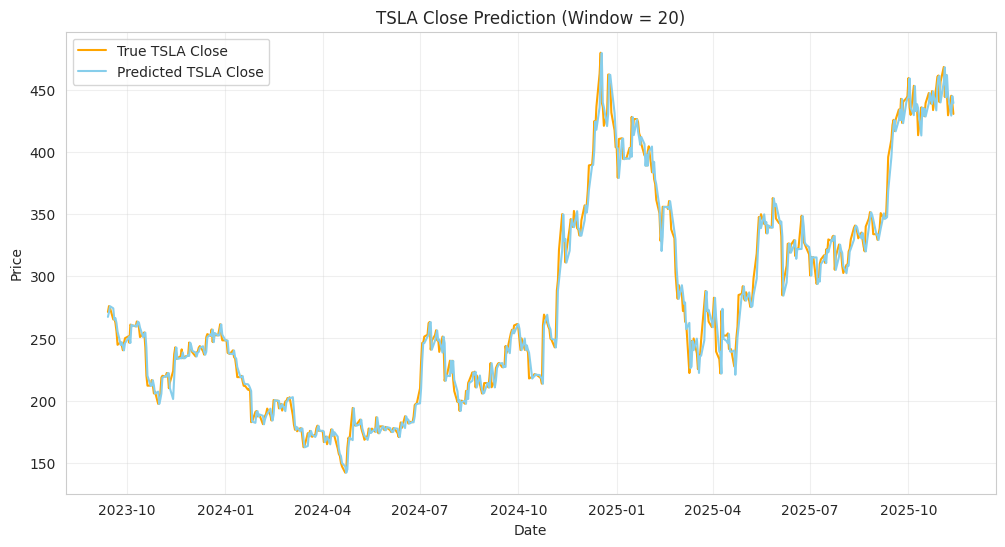


Metrics:
MAE_price: 7.7290
RMSE_price: 10.9108
MAPE_price: 2.7720
direction_acc: 0.4442
{'MAE_price': np.float64(7.728991896816795), 'RMSE_price': np.float64(10.910768699495716), 'MAPE_price': np.float64(2.772002874908331), 'direction_acc': np.float64(0.44424778761061945)}


In [86]:
results = {}
ws = 20
results["all"] = run_experiment(df_merged, [0, 1, 2, 3, 4, 5, 6], 8, ws)
print(results['all'])

## Exclude BYD


 Running Window Size = 20

# Train: 2022
# Val:   225
# Test:  566
# Input shape: (20, 6)
Epoch 1/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0550 - mae: 0.0550 - val_loss: 0.0289 - val_mae: 0.0289
Epoch 2/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0306 - mae: 0.0306 - val_loss: 0.0284 - val_mae: 0.0284
Epoch 3/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0262 - mae: 0.0262 - val_loss: 0.0285 - val_mae: 0.0285
Epoch 4/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0242 - mae: 0.0242 - val_loss: 0.0282 - val_mae: 0.0282
Epoch 5/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0245 - mae: 0.0245 - val_loss: 0.0282 - val_mae: 0.0282
Epoch 6/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0237 - mae: 0.0237 - val_loss: 0.0283 - val_mae: 0.0283
Epoch 7/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0236 - mae: 0.0236 - val_loss: 0.0281 - val_mae: 0.0281
Epoch 8/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0235 - mae: 0.0235 - val_l

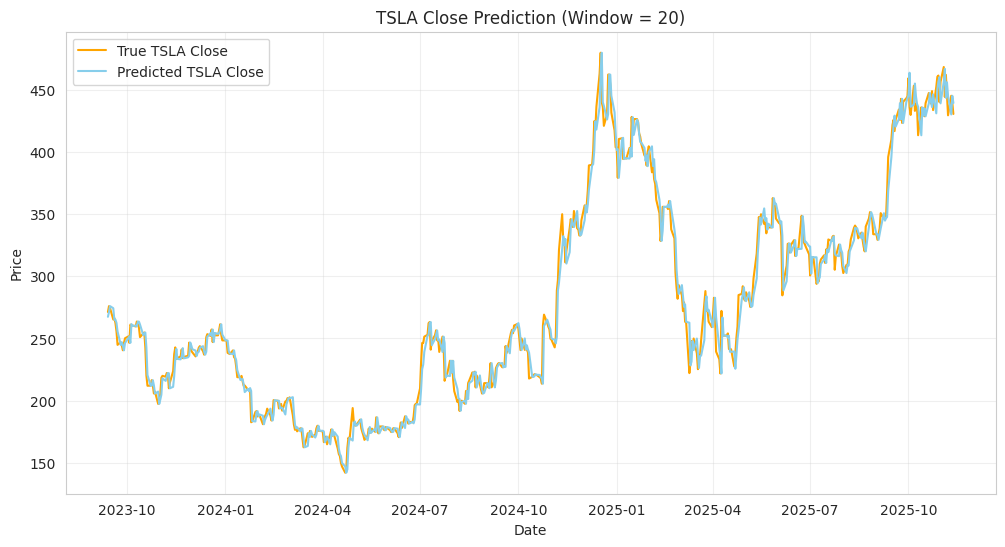


Metrics:
MAE_price: 7.5358
RMSE_price: 10.7244
MAPE_price: 2.7103
direction_acc: 0.4619
{'MAE_price': np.float64(7.535793662520997), 'RMSE_price': np.float64(10.724370373448734), 'MAPE_price': np.float64(2.7102850959821585), 'direction_acc': np.float64(0.46194690265486726)}


In [88]:
results = {}
ws = 20
results["var_1"] = run_experiment(df_merged, [0, 1, 2, 3, 4, 6], 8, ws)
print(results['var_1'])

## Exclude BYD and VALE


 Running Window Size = 20

# Train: 2022
# Val:   225
# Test:  566
# Input shape: (20, 5)
Epoch 1/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0479 - mae: 0.0479 - val_loss: 0.0295 - val_mae: 0.0295
Epoch 2/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0289 - mae: 0.0289 - val_loss: 0.0282 - val_mae: 0.0282
Epoch 3/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0262 - mae: 0.0262 - val_loss: 0.0282 - val_mae: 0.0282
Epoch 4/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0249 - mae: 0.0249 - val_loss: 0.0282 - val_mae: 0.0282
Epoch 5/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0243 - mae: 0.0243 - val_loss: 0.0281 - val_mae: 0.0281
Epoch 6/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0242 - mae: 0.0242 - val_loss: 0.0281 - val_mae: 0.0281
Epoch 7/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0240 - mae: 0.0240 - val_loss: 0.0281 - val_mae: 0.0281
Epoch 8/200
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0238 - mae: 0.0238 - val_lo

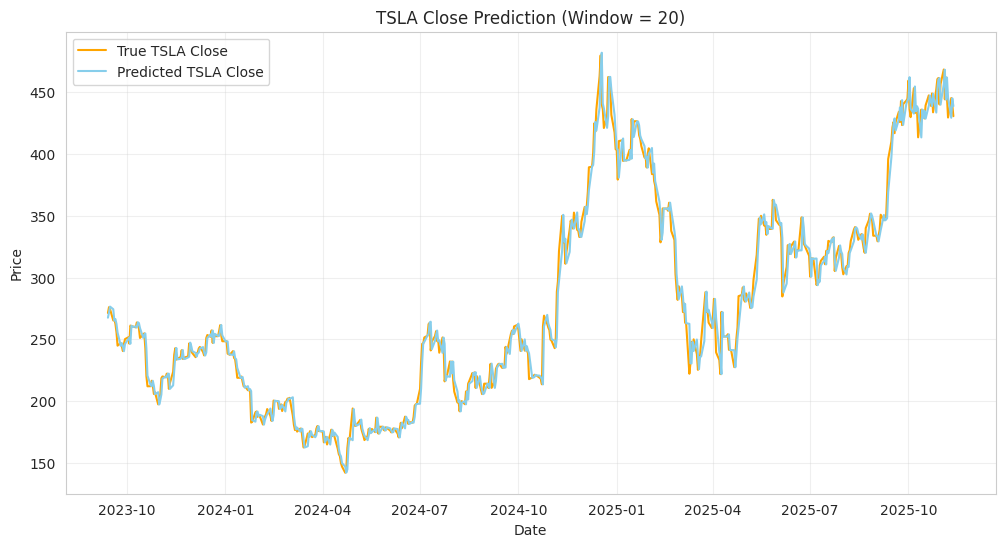


Metrics:
MAE_price: 7.5171
RMSE_price: 10.6990
MAPE_price: 2.6945
direction_acc: 0.4513
{'MAE_price': np.float64(7.517105540029632), 'RMSE_price': np.float64(10.699016848449642), 'MAPE_price': np.float64(2.6945164890376003), 'direction_acc': np.float64(0.45132743362831856)}


In [90]:
results = {}
ws = 20
results["var_2"] = run_experiment(df_merged, [0, 1, 3, 4, 6], 8, ws)
print(results['var_2'])

Using MGA, PLUG, VWAGY, TM gives
MAE_price: 7.5171
RMSE_price: 10.6990
MAPE_price: 2.6945
direction_acc: 0.4513